# To find the most frequently used unimportant words

## importing the libraries

In [24]:
import re
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

## defining helper functions for data preprocessing

### helper function to substitute certain pattern in the input text

In [25]:
def clean_text(text):
    text = re.sub("\'", "", text)
    text = re.sub("[^a-zA-Z]", " ", text)
    text = ' '.join(text.split())
    text = text.lower()
    return text

### helper function to remove certain commonly used english words that do not convey much importance

In [26]:
stop_words = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

### helper function to plot the most frequently used words in the text with their frequencies

In [27]:
def freq_words(x,num_words ,terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  d = words_df.nlargest(columns="count", n = terms)
  most_freq = list(d['word'].iloc[:num_words])
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  return most_freq

## Defining target values

In [28]:
TARGET_COLS=['Analysis of PDEs', 'Applications',
       'Artificial Intelligence', 'Astrophysics of Galaxies',
       'Computation and Language', 'Computer Vision and Pattern Recognition',
       'Cosmology and Nongalactic Astrophysics',
       'Data Structures and Algorithms', 'Differential Geometry',
       'Earth and Planetary Astrophysics', 'Fluid Dynamics',
       'Information Theory', 'Instrumentation and Methods for Astrophysics',
       'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory',
       'Optimization and Control', 'Representation Theory', 'Robotics',
       'Social and Information Networks', 'Statistics Theory',
       'Strongly Correlated Electrons', 'Superconductivity',
       'Systems and Control']

TOPIC_COLS=['Computer Science', 'Mathematics', 'Physics', 'Statistics']

## loading the dataset

In [29]:
train = pd.read_csv('/content/drive/MyDrive/research paper topic recognition/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/research paper topic recognition/Test.csv')

## data preprocessing

In [30]:
train['ABSTRACT'] = train['ABSTRACT'].apply(lambda x: clean_text(x))
train['ABSTRACT'] = train['ABSTRACT'].apply(lambda x: remove_stopwords(x))

test['ABSTRACT'] = test['ABSTRACT'].apply(lambda x: clean_text(x))
test['ABSTRACT'] = test['ABSTRACT'].apply(lambda x: remove_stopwords(x))

In [31]:
all_data=pd.concat([train,test])

In [32]:
all_data['ABSTRACT']

0       ever growing datasets inside observational ast...
1       propose framework considering optimal matching...
2       nanostructures open shell transition metal mol...
3       stars self gravitating fluids inside pressure ...
4       deep neural perception control networks likely...
                              ...                        
5997    first step inside constructing machine learnin...
5998    focus paper quantify measures aggregate fluctu...
5999    autonomous vehicles become every day reality h...
6000    hamiltonian monte carlo hmc method recognized ...
6001    investigate anisotropic nature magnetocrystall...
Name: ABSTRACT, Length: 20006, dtype: object

## Plotting the most frequently used words and their frequencies. The function also returns the top n most used words

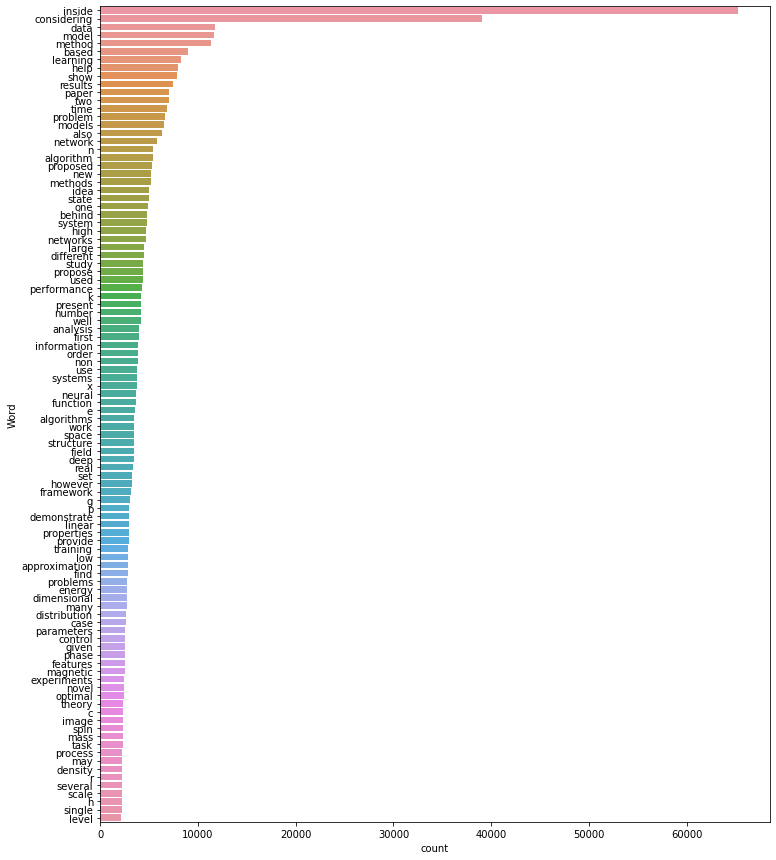

In [33]:
most_freq = freq_words(all_data['ABSTRACT'],2,100)

In [34]:
print(most_freq)

['inside', 'considering']


### saving the most frequently used words returned

In [35]:
with open("/content/drive/MyDrive/research paper topic recognition/frequently_used.txt", "wb") as fp:
    pickle.dump(most_freq, fp)